In [3]:
def is_highly_irregular(G, n):

    deg = G.degree()
    neighbors = G.neighbors 
    
    for v in G.vertices():
        seen = set()
        for u in neighbors(v):
            d = deg[u]
            if d in seen:
                return False
            seen.add(d)
    return True


def find_highly_irregular_graphs(n):
    print(f"Processing n = {n}")
    result = []
    count = 0
    
    min_edges = n-1
    max_edges = (n * (n + 2)) // 8 
    max_degree = n // 2
    
    geng_cmd = f"{n} -c {min_edges}:{max_edges} -d1 -D{max_degree}"
    for G in graphs.nauty_geng(geng_cmd):

        if is_highly_irregular(G, n):
            result.append(G)
            count += 1
        
            
    print(f"Found {count} highly irregular graph(s) of order {n}")
    return result

In [4]:
# Graphs of order up to 9.
highly_irregular_up_to_9 = [[] for _ in range(10)]

for n in range(4, 10):  
    highly_irregular_up_to_9[n] = find_highly_irregular_graphs(n)

Processing n = 4


Found 1 highly irregular graph(s) of order 4
Processing n = 5
Found 0 highly irregular graph(s) of order 5
Processing n = 6
Found 1 highly irregular graph(s) of order 6
Processing n = 7
Found 0 highly irregular graph(s) of order 7
Processing n = 8
Found 3 highly irregular graph(s) of order 8
Processing n = 9


Found 3 highly irregular graph(s) of order 9



Drawing for n = 4 (Total 1)
Graph 1 of order 4


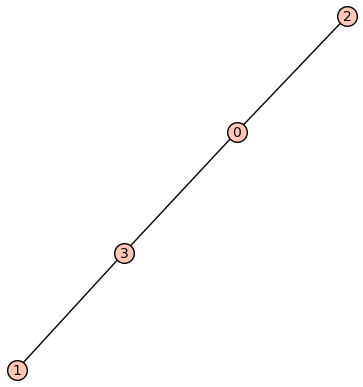

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv0v2}{rgb}{0.0,0.0,0.0}
\definecolor{cv0v3}{rgb}{0.0,0.0,0.0}
\definecolor{cv1v3}{rgb}{0.0,0.0,0.0}
%
\Vertex[style={minimum size=0.2cm,draw=cv0,fill=cfv0,text=clv0,shape=circle},LabelOut=false,L=\hbox{$0$},x=1.7511cm,y=3.3062cm]{v0}
\Vertex[style={minimum size=0.2cm,draw=cv1,fill=cfv1,text=clv1,shape=circle},LabelOut=false,L=\hbox{$1$},x=5.0cm,y=0.0cm]{v1}
\Vertex[style={minimum size=0.2cm,draw=cv2,fill=cfv2,text=clv2,shape=circle},LabelOut=false,L=\hbox{$2$},x=0.0cm,y=5.0cm]{v2}
\Vertex[style={minimum size=0.2c

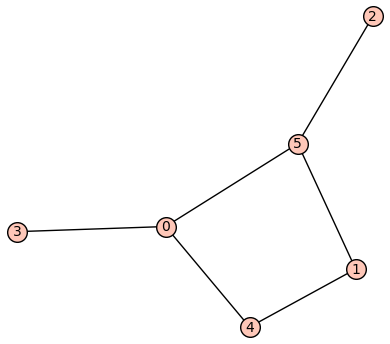

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.502,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{1.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.502,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{1.0,0.0,0.0}
\definecolor{cv0v3}{rgb}{0.0,0.0,0.0}
\definecolor{cv0v4}{rgb}{0.0,0.0,0.0}
\definecolor{cv0v5}{rgb}{0.0,0.0,0.0}
\definecolor{cv1v4}{rgb}{0.0,0.0,0.0}
\definecolor{cv1v5}{rgb}{0.0,0.0,0.0}
\definecolor{cv2v5}{rgb}{0.0,0.0,0.0}
%
\Vertex[style={minimum size=0.2cm,draw=cv0,fill=cfv0,text=clv0,shape=circle},L

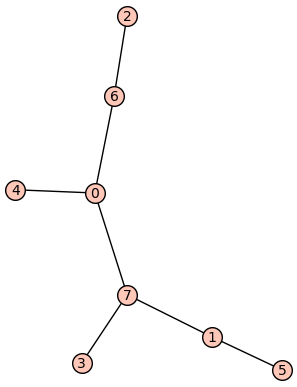

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.502,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{1.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.502,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{1.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.502,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{1.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.502,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{1.0,0.0,0.0}
\definecolor{cv0v4}{rgb}{0.0,0.0,0.0}
\definecolor{cv0v6}{rgb}{0.0,0.0,0.0}
\definec

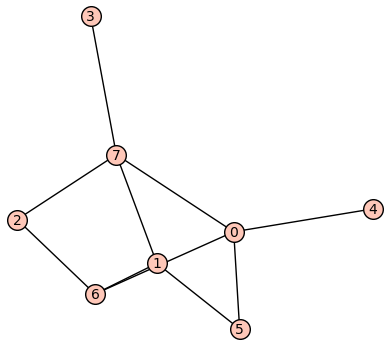

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.502,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{1.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.502,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{1.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.502,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{1.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.502,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{1.0,0.0,0.0}
\definecolor{cv0v4}{rgb}{0.0,0.0,0.0}
\definecolor{cv0v5}{rgb}{0.0,0.0,0.0}
\definec

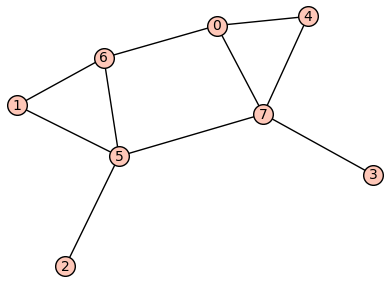

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.502,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{1.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.502,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{1.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.502,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{1.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.502,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{1.0,0.0,0.0}
\definecolor{cv0v4}{rgb}{0.0,0.0,0.0}
\definecolor{cv0v6}{rgb}{0.0,0.0,0.0}
\definec

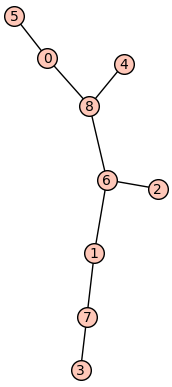

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.502,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{1.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.502,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{1.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.502,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{1.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.502,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{1.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.502,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\defineco

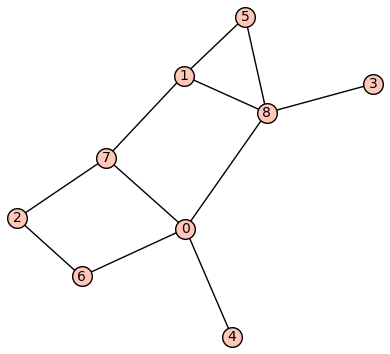

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.502,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{1.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.502,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{1.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.502,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{1.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.502,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{1.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.502,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\defineco

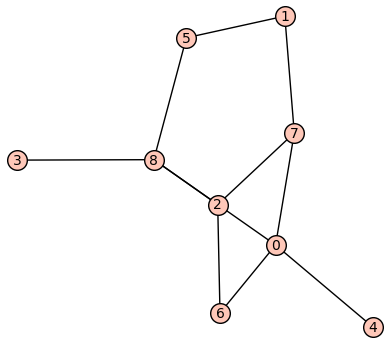

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.502,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{1.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.502,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{1.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.502,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{1.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.502,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{1.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.502,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\defineco

In [5]:
for n in range(4, 10):
    print(f"\nDrawing for n = {n} (Total {len(highly_irregular_up_to_9[n])})")
    
    for i, G in enumerate(highly_irregular_up_to_9[n]):
        print(f"Graph {i+1} of order {n}")
        
        G.show()
        
        G.set_latex_options(
            graphic_size=(5,5),
            vertex_size=0.2,
            edge_thickness=0.1,
            edge_color='black',
            vertex_color='green',
            vertex_label_color='red')
        
        print(latex(G))  
        
    degree_sets = set(tuple(sorted(H.degree())) for H in highly_irregular_up_to_9[n])
    print("Distinct degree sequences:", degree_sets)

In [6]:
# Graphs of order 10.
highly_irregular_of_10 = find_highly_irregular_graphs(10)

Processing n = 10


Found 13 highly irregular graph(s) of order 10



Drawing for n = 10 (Total 13)
DDS: {(1, 1, 1, 1, 2, 2, 3, 3, 4, 4), (1, 1, 1, 1, 2, 2, 2, 2, 3, 3), (1, 1, 2, 2, 2, 2, 3, 3, 4, 4), (1, 1, 2, 2, 3, 3, 4, 4, 5, 5)}
Graph 1 of order 10


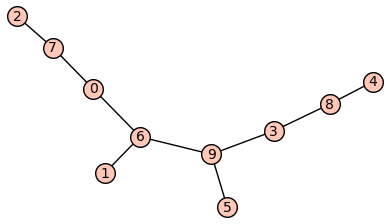

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

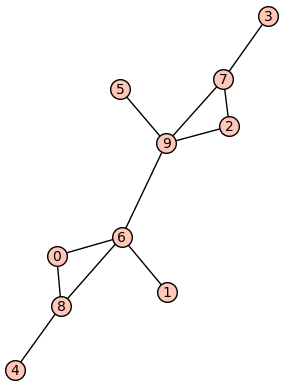

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

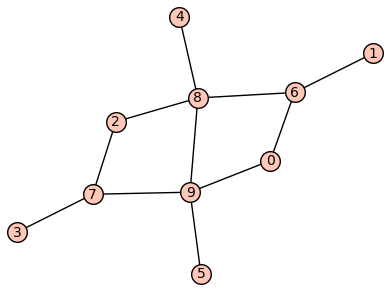

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

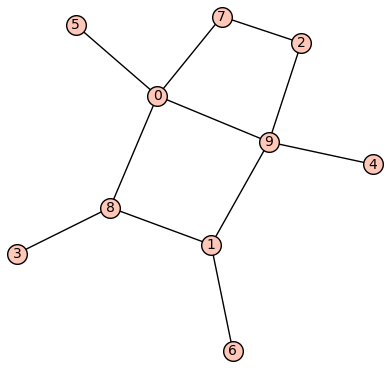

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

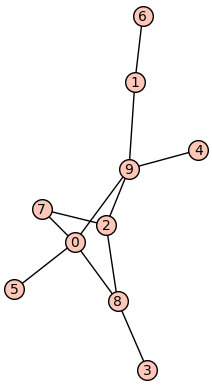

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

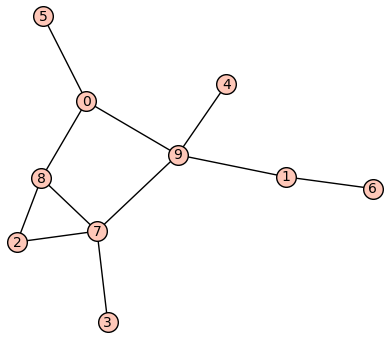

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

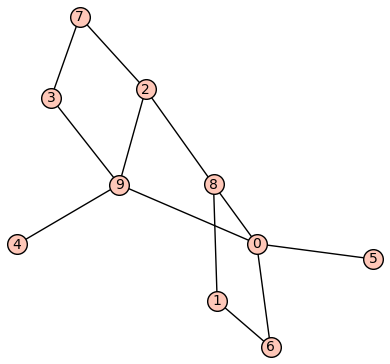

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

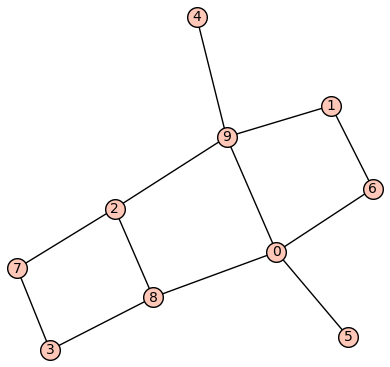

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

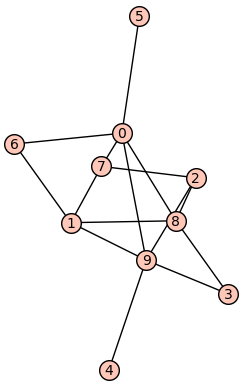

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

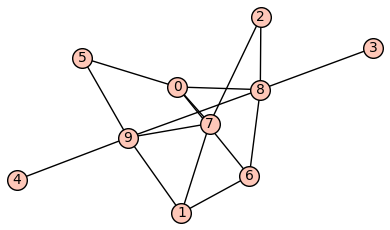

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

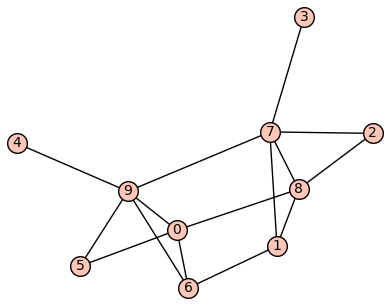

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

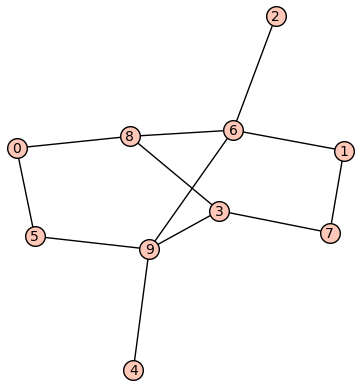

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

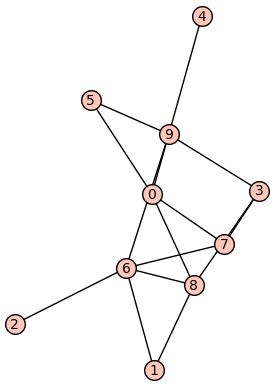

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

In [7]:
print(f"\nDrawing for n = {10} (Total {len(highly_irregular_of_10)})")

degree_sets = set(tuple(sorted(H.degree())) for H in highly_irregular_of_10)
print("DDS:", degree_sets)  

for i, G in enumerate(highly_irregular_of_10):
    print(f"Graph {i+1} of order {10}")
    G.show()
    
    G.set_latex_options(
            graphic_size=(5,5),
            vertex_size=0.1,
            edge_thickness=0.1,
            edge_color='black')
        
    print(latex(G))  

In [8]:
# Graphs of order 11.
highly_irregular_of_11 = find_highly_irregular_graphs(11)

Processing n = 11


Found 21 highly irregular graph(s) of order 11



Drawing for n = 11 (Total 21)
DDS: {(1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5), (1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4)}
Graph 1 of order 11


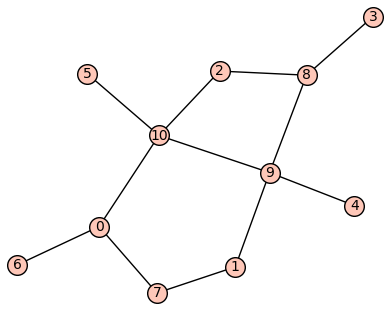

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

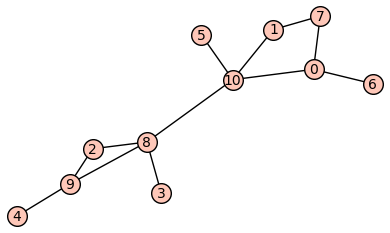

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

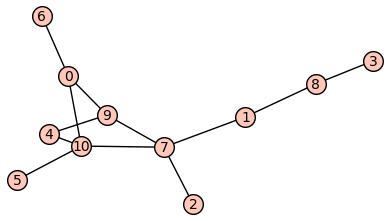

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

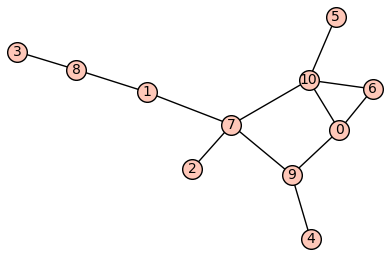

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

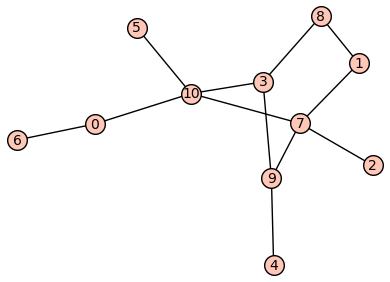

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

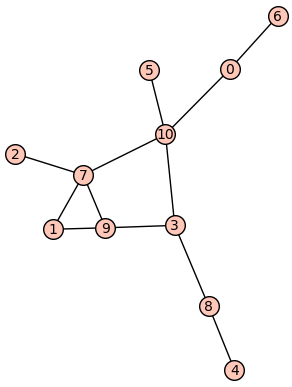

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

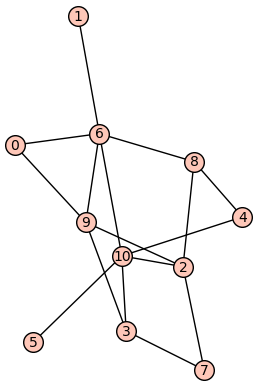

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

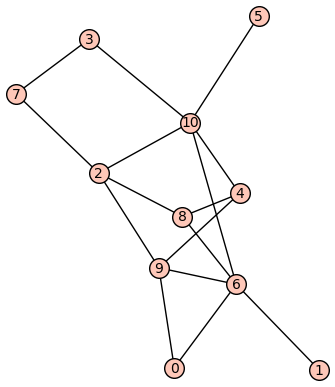

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

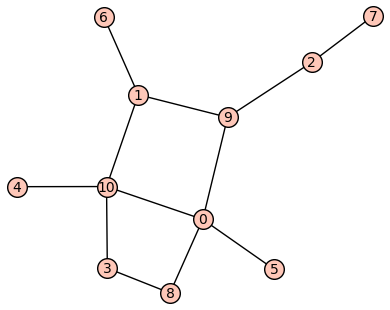

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

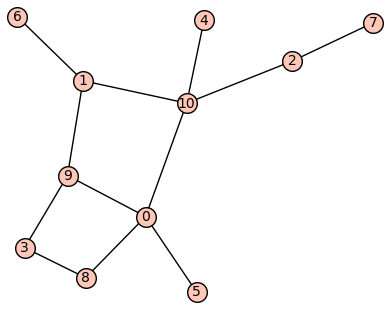

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

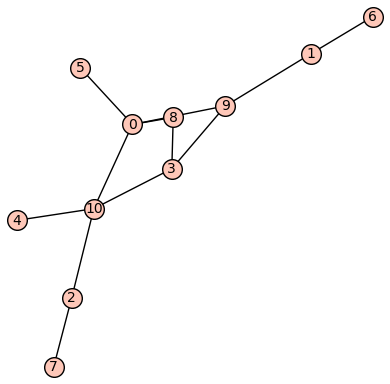

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

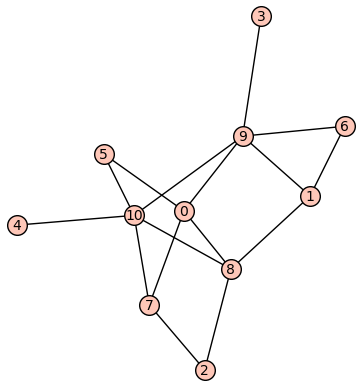

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

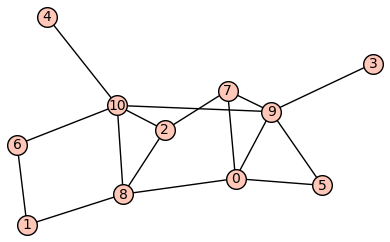

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

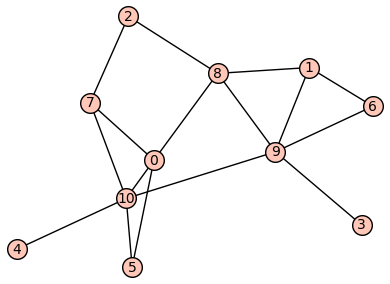

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

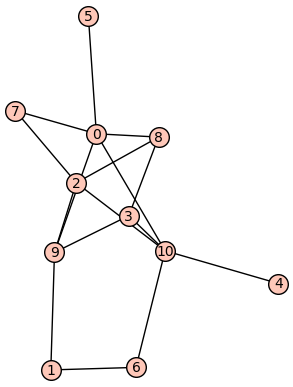

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

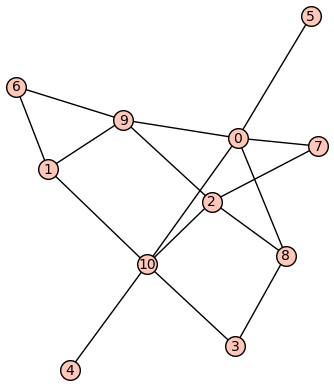

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

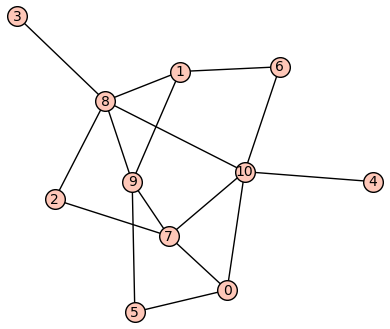

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

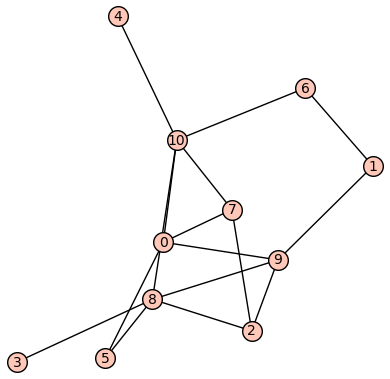

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

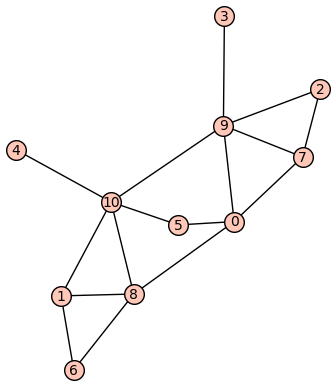

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

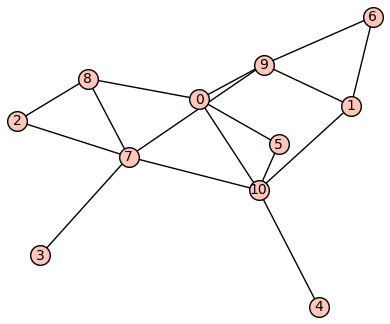

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

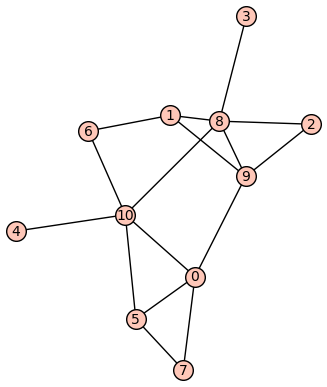

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

In [9]:
print(f"\nDrawing for n = {11} (Total {len(highly_irregular_of_11)})")

degree_sets = set(tuple(sorted(H.degree())) for H in highly_irregular_of_11)
print("DDS:", degree_sets)  

for i, G in enumerate(highly_irregular_of_11):
    print(f"Graph {i+1} of order {11}")
    G.show()
    
    G.set_latex_options(
            graphic_size=(5,5),
            vertex_size=0.1,
            edge_thickness=0.1,
            edge_color='black')
        
    print(latex(G))  

In [10]:
from itertools import combinations_with_replacement


def find_degree_sequence_for_hi_order_12(ds):
    print(f"Checking degree sequence: {ds}")
    count = 0

    for G in graphs(vertices=12, degree_sequence=ds, loops = False):
        if not G.is_connected():
            continue
            
        if is_highly_irregular(G, 12):
            count += 1
    
    print(f"Found {count} highly irregular graph(s) with degree sequence {ds}")

    from itertools import combinations_with_replacement

    
def is_graphical_hh(sequence):
    while True:
        sequence = [d for d in sequence if d != 0]
        if not sequence:
            return True
        
        sequence.sort(reverse=True)
        first = sequence.pop(0)
        if first > len(sequence):
            return False

        for i in range(first):
            if sequence[i] == 0:
                return False
            sequence[i] -= 1


#ds_l = []
#for d in range(1, 7):
#    base = []
#    for i in range(1, d + 1):
#        base.extend([i, i])
#
#    remaining = 12 - 2 * d
#    for comb in combinations_with_replacement(range(1, d + 1), remaining):
#        ds = base + list(comb)
#        ds_l.append(ds)
#
#for seq in ds_l:
#    if is_graphical_hh(seq):
#        find_degree_sequence_for_hi_order_12(seq)